### $$\text{Integration using Trapezoidal method and Simpson's }(\frac{1}{3})^{rd} \text{ method } :$$
$\textbf{Trapezoid rule} \text{ approximates the integral }\displaystyle \int_a^b f(x)\text{ d}x \text{ by the sum :} $ $$\displaystyle \frac{dx}{2} \sum_{k=1}^N (f(x_k) + f(x_{k-1})) \text{ where } \displaystyle x_k = a + k*\text{d}x \text{ and d}x = \frac{(b - a)}{N}.$$       
$$ \\ $$
$\textbf{Simpson's rule} \text{ approximates the integral }\displaystyle\int_a^b f(x)\text{ d}x \text{ by the sum :}$ $$ \displaystyle \frac{dx}{3} \sum_{k=1}^{N/2} (f(x_{2i-2} + 4f(x_{2i-1}) + f(x_{2i})) \text{ where }\displaystyle x_i = a + i*\text{d}x\text{ and d}x = \frac{(b - a)}{N}.$$ 

    Parameters                                                           
    ----------                                       
    f : function                                    
        Vectorized function of a single variable         
    a , b : numbers                                       
        Interval of integration [a,b]                   
    N : integer
        Number of subintervals of [a,b]              
        
    Returns     
    -------
     float     
         Approximation of the integral of f(x) from a to b using the Trapezoid rule 
         and the Simpson's rule with N subintervals of equal length.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def trapz(f,a,b,N=50):
    x = np.linspace(a,b,N+1) 
    y = f(x)
    y_right = y[1:] 
    y_left = y[:-1] 
    dx = (b - a)/N
    T = (dx/2) * np.sum(y_right + y_left)
    return T

def simps(f,a,b,N=50):
    if N % 2 == 1:
        raise ValueError("N must be an even integer.")
    dx = (b-a)/N
    x = np.linspace(a,b,N+1)
    y = f(x)
    S = dx/3 * np.sum(y[0:-1:2] + 4*y[1::2] + y[2::2])
    return S

Q1.WAP to calculate the numerical integration of a given function within given limits using **Trapezoidal method**.
$$\text{and}$$ 
Q2.WAP to calculate the numerical integration of a given function within given limits using **Simpson’s $(\frac{1}{3})^{ rd}$ rule**.          Verify the program with three functions for which you know the integration results.

#### $\textbf{Example 1}: \displaystyle \int_{1}^{2} (x+1) dx $

In [2]:
print('trapezoidal method for (x+1) \t:',trapz(lambda x : x+1,1,2,1))
print("simpson's 1/3 method for (x+1) \t:",simps(lambda x : x+1,1,2,2))

trapezoidal method for (x+1) 	: 2.5
simpson's 1/3 method for (x+1) 	: 2.5


#### $\textbf{Example 2}: \displaystyle \int_{1}^{2} \frac{1}{x} dx $

In [3]:
print('trapezoidal method for (1/x) \t:',trapz(lambda x : 1/x,1,2,50))
print("simpson's 1/3 method for (1/x) \t:",simps(lambda x : 1/x,1,2,50))
print('verification of actual value \t:',np.log(2))

trapezoidal method for (1/x) 	: 0.6931721793101951
simpson's 1/3 method for (1/x) 	: 0.6931471855549542
verification of actual value 	: 0.6931471805599453


#### $\textbf{Example 3}:\displaystyle \int_{0}^{\pi} \sin{x}{dx} $

In [4]:
print("trapezoidal method for sin(x)   \t:",trapz(lambda x : np.sin(x),0,np.pi,10))
print("simpson's 1/3 method for sin(x) \t:",simps(lambda x : np.sin(x),0,np.pi,10))

trapezoidal method for sin(x)   	: 1.9835235375094549
simpson's 1/3 method for sin(x) 	: 2.0001095173150043


Q3. Use both the programs to plot the function :
$$ \displaystyle G(M)=\int_{0}^M e^{-x^2} dx$$
As a function of **M**. (Try to go upto a very large value of M.) Use step size = 0.0001 in both the cases.

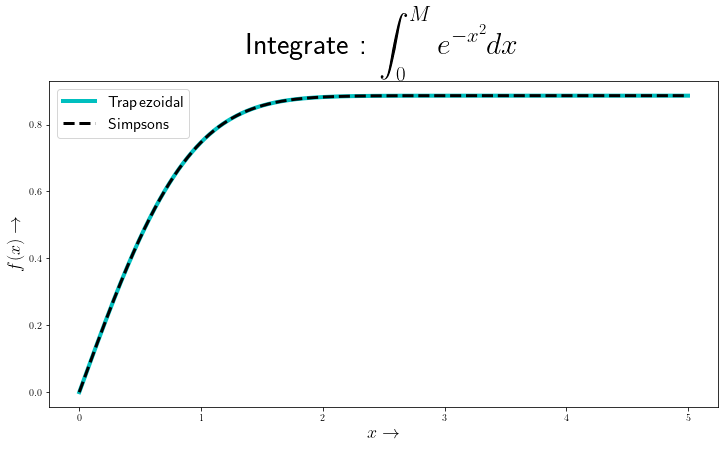

In [6]:
a=10000               # for step size = 0.0001
n=5*a
A=[i/a for i in range(n+1)]
tr=([trapz(lambda x : np.exp(-x**2),0,M,100)for M in A])
sm=([simps(lambda x : np.exp(-x**2),0,M,100)for M in A])
fig = plt.figure(figsize=(12,6))
plt.plot(A,tr,'c-', linewidth=4)
plt.plot(A,sm,'k--', linewidth=3)
plt.rcParams['text.usetex'] = True
plt.xlabel(r'$x \rightarrow$',size=18)
plt.ylabel(r'$f(x) \rightarrow$',size=18)
plt.title(r'Integrate : $\displaystyle\int_{0}^M e^{-x^2} dx$',fontsize=30)
plt.legend(['Trapezoidal','Simpsons'],fontsize=16)
plt.show()  

Q4. Evaluate the Integral $ \displaystyle \int_{-1}^1 (x^8-3x^6+2x^4) \text{ d}x $ as a function of step size  using both the progams.

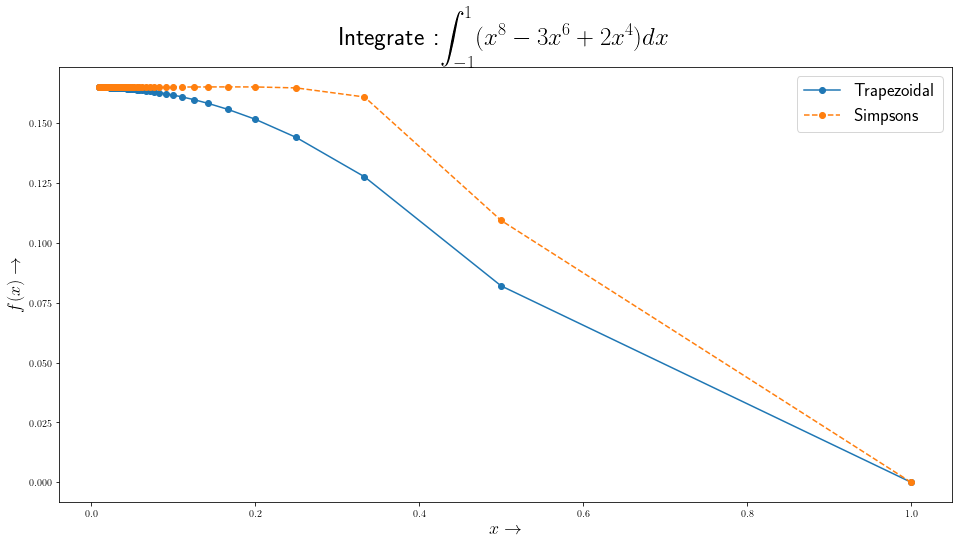

In [7]:
a,b=-1,1                                   
A=[2*i for i in range(1,101)]
h=[(b-a)/j for j in A]               # setting step size
tr=[trapz(lambda x : ((x**8)-(3*x**6)+(2*x**4)),a,b,M) for M in A]
sm=[simps(lambda x : ((x**8)-(3*x**6)+(2*x**4)),a,b,M) for M in A] 
fig = plt.figure(figsize=(16,8))
plt.plot(h,tr,'o-',h,sm,'o--')
plt.xlabel(r'$x \rightarrow$',size=18)
plt.ylabel(r'$f(x) \rightarrow$',size=18)
plt.title(r'Integrate :$\displaystyle\int_{-1}^1 (x^8-3x^6+2x^4)dx$',fontsize=25)
plt.legend(['Trapezoidal','Simpsons'],fontsize=18)
plt.show()